In [1]:
from qoalgo.base import QueryGraph
from qoalgo.dpccp import Dpccp
from qoalgo.graphviz import join_tree_to_graphviz, querygraph_to_graphviz
import pandas as pd
from graphviz import Source
pd.set_option('display.max_rows', None) # display ALL the rows

# ! Add Relations in BFS order!

# DPccp

We first define a query graph for our examples:

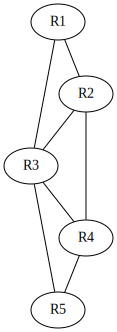

In [2]:
qg = QueryGraph() # add relations in BFS order!
r1= qg.add_relation('R1', 10)
r2 = qg.add_relation('R2', 20)
r3 = qg.add_relation('R3', 50)
r4 = qg.add_relation('R4', 20)
r5 = qg.add_relation('R5', 10)
qg.add_join(r1, r2, 0.1)
qg.add_join(r1, r3, 0.1)
qg.add_join(r2, r3, 0.1)
qg.add_join(r2, r4, 0.1)
qg.add_join(r3, r4, 0.1)
qg.add_join(r3, r5, 0.1)
qg.add_join(r4, r5, 0.1)

Source(querygraph_to_graphviz(qg, cardinalities=False, selectivities=False))

## Example 1 - Enumeration of all CSG-CMP pairs
This example comes from the 8th tutorial. The solution can be found in moodle.

In [3]:
dpccp = Dpccp(qg)

table = []
# we're not using dpccp.get_csg_cmp_pairs here so we can also illustrate empty cmp sets.
for csg in dpccp.enumerate_csg():
    cmps = list(dpccp.enumerate_cmp(csg))
    if len(cmps) == 0:
        table.append({
            'csg':  str(list(map(str, csg))),
            'cmp': '[]'
        })
    else:
        for cmp in cmps:
            table.append({
                'csg':  str(list(map(str, csg))),
                'cmp': str(list(map(str,cmp)))
            })
pd.DataFrame.from_dict(table)

,csg,cmp
0,['R5'],[]
1,['R4'],['R5']
2,"['R4', 'R5']",[]
3,['R3'],['R5']
4,['R3'],['R4']
5,['R3'],"['R4', 'R5']"
6,"['R3', 'R4']",['R5']
7,"['R3', 'R5']",['R4']
8,"['R3', 'R4', 'R5']",[]
9,['R2'],['R4']


## Example 2 - Get the optimal join tree based on c_out

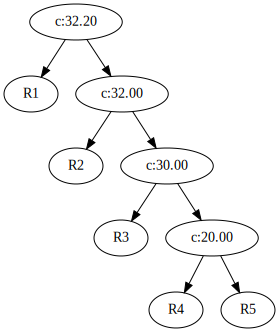

In [4]:
t = dpccp.run()
Source(join_tree_to_graphviz(t))

## All dpccp combinations

In [5]:
table = []
for key, tree_lst in dpccp.dpverbose.items():
    for tree in tree_lst:
        table.append({
            'l': len(tree.relations),
            'relations' : key,
            'tree': str(tree),
            'cost': tree.cost,
            'cheapest': 'Yes' if tree == dpccp.dptable[key] else 'No'
        })
pd.DataFrame.from_dict(table).sort_values(by=['l', 'relations'], ascending=True)

,l,relations,tree,cost,cheapest
30,2,R1-R2,R1⨝R2,20.0,Yes
21,2,R1-R3,R1⨝R3,50.0,Yes
9,2,R2-R3,R2⨝R3,100.0,Yes
6,2,R2-R4,R2⨝R4,40.0,Yes
2,2,R3-R4,R3⨝R4,100.0,Yes
1,2,R3-R5,R3⨝R5,50.0,Yes
0,2,R4-R5,R4⨝R5,20.0,Yes
31,3,R1-R2-R3,R1⨝(R2⨝R3),110.0,No
32,3,R1-R2-R3,(R1⨝R2)⨝R3,30.0,Yes
33,3,R1-R2-R3,(R1⨝R3)⨝R2,60.0,No


# ex13

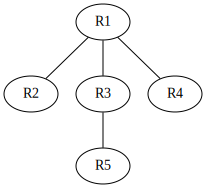

In [8]:
qg = QueryGraph() # add relations in BFS order!
r1= qg.add_relation('R1', 10)
r2 = qg.add_relation('R2', 10)
r3 = qg.add_relation('R3', 10)
r4 = qg.add_relation('R4', 10)
r5 = qg.add_relation('R5', 10)
qg.add_join(r1, r2, 0.1)
qg.add_join(r1, r3, 0.1)
qg.add_join(r1, r4, 0.1)
qg.add_join(r3, r5, 0.1)

Source(querygraph_to_graphviz(qg, cardinalities=False, selectivities=False))

In [9]:
dpccp = Dpccp(qg)

table = []
# we're not using dpccp.get_csg_cmp_pairs here so we can also illustrate empty cmp sets.
for csg in dpccp.enumerate_csg():
    cmps = list(dpccp.enumerate_cmp(csg))
    if len(cmps) == 0:
        table.append({
            'csg':  str(list(map(str, csg))),
            'cmp': '[]'
        })
    else:
        for cmp in cmps:
            table.append({
                'csg':  str(list(map(str, csg))),
                'cmp': str(list(map(str,cmp)))
            })
pd.DataFrame.from_dict(table)

,csg,cmp
0,['R5'],[]
1,['R4'],[]
2,['R3'],['R5']
3,"['R3', 'R5']",[]
4,['R2'],[]
5,['R1'],['R4']
6,['R1'],['R3']
7,['R1'],"['R3', 'R5']"
8,['R1'],['R2']
9,"['R1', 'R2']",['R4']
